# Import Data and Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

path = os.getcwd() + '\\' + 'Data' + '\\' + 'Credit Card Dataset for Clustering' + '\\'
df_data = pd.read_csv(path+ 'CC GENERAL.csv')

# Data Preprocessing

In [2]:
df_data.head(3)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.0,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.0,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.0,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12


In [3]:
df_data.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [4]:
df_data['TENURE'].unique()

array([12,  8, 11,  9, 10,  7,  6], dtype=int64)

In [5]:
df_data['CREDIT_LIMIT'].fillna(df_data['CREDIT_LIMIT'].mean(), inplace = True)
df_data['MINIMUM_PAYMENTS'].fillna(df_data['MINIMUM_PAYMENTS'].mean(), inplace = True)

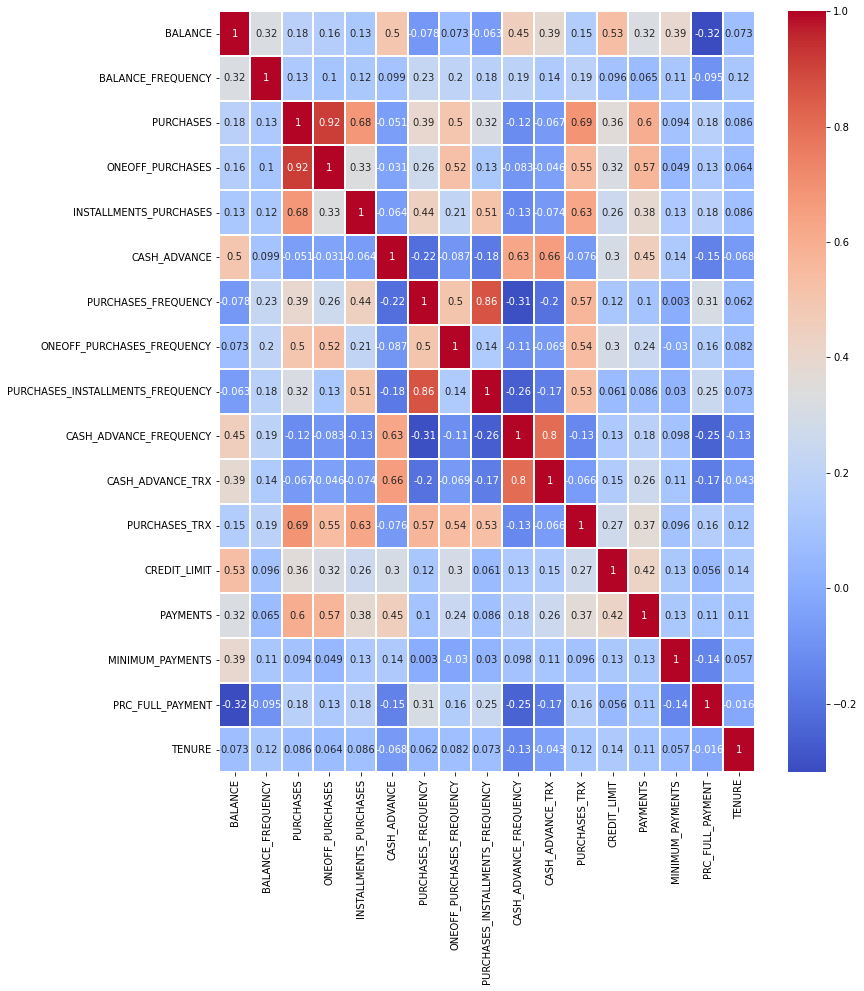

In [6]:
#find correlation features
plt.figure(figsize=(12,14))
sns.heatmap(df_data.corr(), cmap = 'coolwarm', annot = True, linewidth=2)
plt.show()

# Standard Scaler

In [7]:
data =  df_data.drop('CUST_ID', axis = 1)

In [8]:
#Scalling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

data_scaled = pd.DataFrame(data_scaled, columns = data.columns)

In [9]:
data_scaled.head(2)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960433,-0.528979,-0.310968,-0.525551,0.36068
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688639,0.818642,0.089310,0.234227,0.36068


# K-Means Clustering

In [10]:
seg = data
cols = data.columns
sc = StandardScaler()
data_km = sc.fit_transform(seg)
data_km = pd.DataFrame(seg, columns=cols)
data_km.head(1)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.4,0.0,95.4,0.0,0.166667,0.0,0.083333,0.0,0,2,1000.0,201.802084,139.509787,0.0,12


Text(0, 0.5, 'Sum of squared distance')

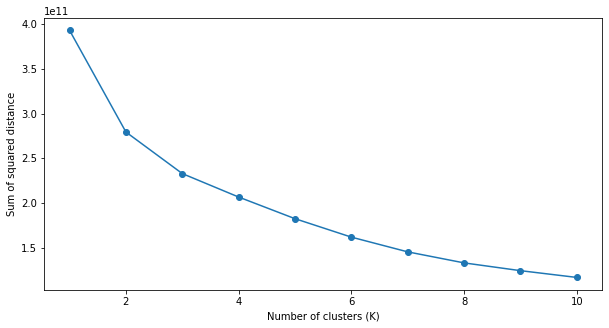

In [11]:
#Cluster Optimum
sse = []
list_k = list(range(1, 11))# Turn dataframe into list
list_data = np.array(seg.values.tolist())

for k in list_k:
    km = KMeans(n_clusters=k, max_iter=100)
    km.fit(list_data)
    sse.append(km.inertia_)# Plot sse against k
plt.figure(figsize=(10, 5))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters (K)')
plt.ylabel('Sum of squared distance')

In [12]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3, random_state = 34)
model.fit(seg)

KMeans(n_clusters=3, random_state=34)

In [13]:
df_data['Segmentasi'] = model.labels_ + 1

In [14]:
df_data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Segmentasi
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,3
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,3
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,3
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1


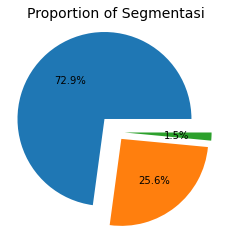

In [15]:
explore_target = df_data['Segmentasi'].value_counts()
explode = (0.2, 0.1, 0.1)
plt.pie(explore_target,
        autopct='%1.1f%%',
       explode=explode)
plt.title('Proportion of Segmentasi', size = 14)
plt.show()

In [16]:
df_data_new = df_data.groupby(['Segmentasi']).mean()
df_data_new

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
Segmentasi,,,,,,,,,,,,,,,,,
1,855.020793,0.854242,603.865755,312.418578,291.746008,494.812801,0.467574,0.154076,0.352367,0.106767,2.252875,10.672903,2746.184333,997.114511,585.184281,0.156951,11.432909
2,4797.203573,0.908474,10470.723657,7392.990149,3077.897687,5389.983323,0.737381,0.582883,0.592930,0.229106,9.186567,83.791045,12470.522388,17990.694944,2462.059519,0.326800,11.843284
3,3391.561584,0.940884,1585.097037,991.011869,594.397129,2096.716521,0.540643,0.317718,0.385393,0.210288,5.732026,22.146841,8996.254704,2875.250817,1563.723695,0.134413,11.738126


In [17]:
df_data['Segmentasi'] = df_data['Segmentasi'].map({1:'Priority Customer', 2:'Solitaire Customer', 3:'High Priority Customer'})
df_data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Segmentasi
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,Priority Customer
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,High Priority Customer
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,High Priority Customer
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,High Priority Customer
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,Priority Customer


C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


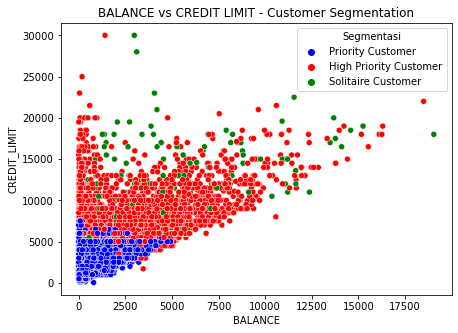

In [18]:
plt.figure(figsize=(7,5))
X = df_data['BALANCE']
Y = df_data['CREDIT_LIMIT']
g = sns.scatterplot(X, Y, hue = df_data['Segmentasi'], palette = ['blue', 'red', 'green'])
g.set_xlabel('BALANCE')
g.set_ylabel('CREDIT_LIMIT')
g.set_title('BALANCE vs CREDIT LIMIT - Customer Segmentation')
#plt.xlim([0, 15000])
#plt.ylim([0, 20000])
plt.show()

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


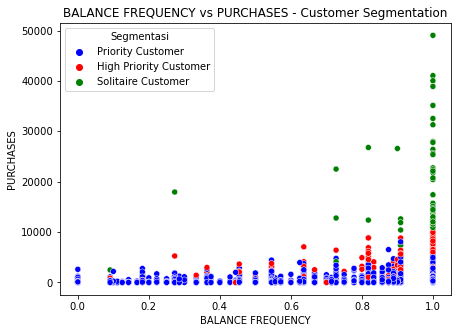

In [19]:
plt.figure(figsize=(7,5))
X = df_data['BALANCE_FREQUENCY']
Y = df_data['PURCHASES']
g = sns.scatterplot(X, Y, hue = df_data['Segmentasi'], palette = ['blue', 'red', 'green'])
g.set_xlabel('BALANCE FREQUENCY')
g.set_ylabel('PURCHASES')
g.set_title('BALANCE FREQUENCY vs PURCHASES - Customer Segmentation')
#plt.xlim([0, 15000])
#plt.ylim([0, 20000])
plt.show()

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


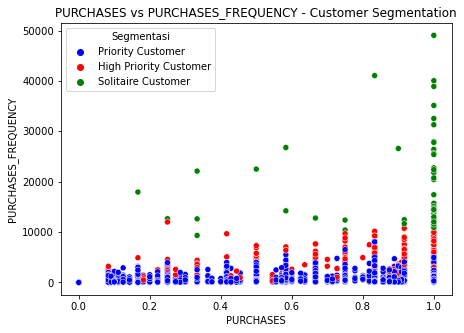

In [20]:
plt.figure(figsize=(7,5))
Y = df_data['PURCHASES']
X = df_data['PURCHASES_FREQUENCY']
g = sns.scatterplot(X, Y, hue = df_data['Segmentasi'], palette = ['blue', 'red', 'green'])
g.set_xlabel('PURCHASES')
g.set_ylabel('PURCHASES_FREQUENCY')
g.set_title('PURCHASES vs PURCHASES_FREQUENCY - Customer Segmentation')
#plt.xlim([0, 15000])
#plt.ylim([0, 20000])
plt.show()

## Conclusion

This notebook using k-means algorithm to segment customers into 3 segment, namely Priority Customer, High Priority Customer, and Solitaire Customer. 